In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,fnmatch

In [2]:
ruta='resultsgmm-nolineal/geodesicdistance-nonrigid/'
files=os.listdir(ruta)
lenfiles=len(files)
pattern='*.txt'
step=0.005
thresh = np.arange(0,0.25+step,step)
tamth=thresh.shape[0]
allcurves=[]

# averageCurve=np.zeros((tamth,))
for fi in files:
    if fnmatch.fnmatch(fi, pattern):
        print('File:',fi)
        geodist = np.loadtxt(ruta+fi, dtype=float)
        
        curve=[]
        for i in range(tamth):
            curve.append(100*np.sum(geodist<=thresh[i])/geodist.shape[0])
        # curve=np.array(curve)
        allcurves.append(curve)
        # averageCurve=averageCurve+curve
# averageCurve=averageCurve/lenfiles
allcurves=np.array(allcurves)

File: cat0-cat1.txt
File: cat0-cat10.txt
File: cat0-cat2.txt
File: cat0-cat3.txt
File: cat0-cat4.txt
File: cat0-cat5.txt
File: cat0-cat6.txt
File: cat0-cat7.txt
File: cat0-cat8.txt
File: cat0-cat9.txt
File: centaur0-centaur1.txt
File: centaur0-centaur2.txt
File: centaur0-centaur3.txt
File: centaur0-centaur4.txt
File: centaur0-centaur5.txt
File: david0-david1.txt
File: david0-david10.txt
File: david0-david11.txt
File: david0-david12.txt
File: david0-david13.txt
File: david0-david6.txt
File: dog0-dog1.txt
File: dog0-dog10.txt
File: dog0-dog2.txt
File: dog0-dog3.txt
File: dog0-dog5.txt
File: dog0-dog6.txt
File: dog0-dog7.txt
File: dog0-dog8.txt
File: horse0-horse10.txt
File: horse0-horse14.txt
File: horse0-horse15.txt
File: horse0-horse17.txt
File: horse0-horse5.txt
File: horse0-horse6.txt
File: horse0-horse7.txt
File: michael0-michael1.txt
File: michael0-michael10.txt
File: michael0-michael11.txt
File: michael0-michael12.txt
File: michael0-michael13.txt
File: michael0-michael14.txt
File:

In [3]:
averageCurve=np.mean(allcurves,axis=0)
stdCurve=np.std(allcurves,axis=0)
np.savetxt('nonlineargmm.txt',averageCurve)

In [4]:
symdata=np.loadtxt('otrosmetodos/sym.txt', dtype=float)
fmsym=np.loadtxt('otrosmetodos/fmsym.txt', dtype=float)
symyemez=np.loadtxt('otrosmetodos/symyemez.txt', dtype=float)

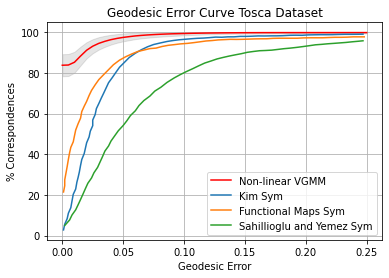

In [5]:
plt.plot(thresh,averageCurve, '-', color='red', label='Non-linear VGMM')
limsup=averageCurve + stdCurve
index=limsup>100
limsup[index]=100
plt.fill_between(thresh, averageCurve - stdCurve, limsup,
                 color='black', alpha=0.1)
plt.plot(symdata[:,0],symdata[:,1], label='Kim Sym')
plt.plot(fmsym[:,0],fmsym[:,1], label='Functional Maps Sym')
plt.plot(symyemez[:,0],symyemez[:,1], label='Sahillioglu and Yemez Sym')

plt.grid(True)
plt.title('Geodesic Error Curve Tosca Dataset')
plt.xlabel('Geodesic Error')
plt.ylabel('% Correspondences')
plt.legend()
plt.savefig('resultsgmm-nolineal/toscacurve.pdf')
plt.show()


In [6]:
from scipy.interpolate import interp1d

f = interp1d(averageCurve, thresh)
val=f(90)
print('Geodesic error for 90%:',val)

Geodesic error for 90%: 0.017971438908721285
